# CART POLE TASK

## Q LEARNING ALGORITHM

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
2
Episode:0 avg:18.0 min:18.0 max:18.0
Episode:50 avg:23.66 min:10.0 max:77.0


<ipython-input-11-c85d2e775a6a>:44: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode:100 avg:21.18 min:9.0 max:47.0
Episode:150 avg:19.18 min:9.0 max:50.0
Episode:200 avg:20.28 min:9.0 max:99.0
Episode:250 avg:16.54 min:9.0 max:54.0
Episode:300 avg:15.76 min:8.0 max:45.0
Episode:350 avg:16.94 min:8.0 max:58.0
Episode:400 avg:17.18 min:9.0 max:89.0
Episode:450 avg:17.12 min:9.0 max:46.0
Episode:500 avg:17.06 min:9.0 max:34.0
Episode:550 avg:16.9 min:8.0 max:38.0
Episode:600 avg:16.52 min:8.0 max:38.0
Episode:650 avg:16.56 min:9.0 max:40.0
Episode:700 avg:16.62 min:9.0 max:62.0
Episode:750 avg:18.14 min:8.0 max:47.0
Episode:800 avg:17.28 min:9.0 max:54.0
Episode:850 avg:16.0 min:8.0 max:46.0
Episode:900 avg:18.24 min:9.0 max:63.0
Episode:950 avg:16.9 min:8.0 max:56.0
Episode:1000 avg:18.66 min:9.0 max:40.0
Episode:1050 avg:13.82 min:8.0 max:54.0
Episode:1100 avg:16.8 min:8.0 max:45.0
Episode:1150 avg:20.06 min:8.0 max:51.0
Episode:1200 avg:17.42 min:8.0 max:41.0
Episode:1250 avg:16.84 min:8.0 max:43.0
Episode:1300 avg:19.0 min:9.0 max:62.0
Episode:1350 avg:17.2 m

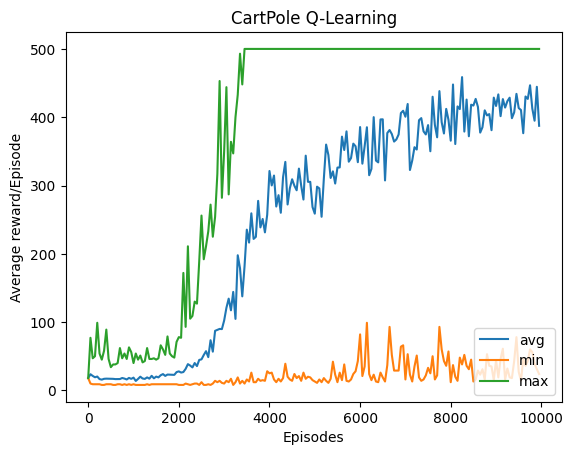

In [11]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt 

env = gym.make("CartPole-v1")

#Environment values
print(env.observation_space.high)	
print(env.observation_space.low)	
print(env.action_space.n)			

#Hyperparamters
EPISODES = 10000
DISCOUNT = 0.95
EPISODE_DISPLAY = 5

0
LEARNING_RATE = 0.25
EPSILON = 0.2


theta_minmax = env.observation_space.high[2]
theta_dot_minmax = math.radians(50)
theta_state_size = 50
theta_dot_state_size = 50
Q_TABLE = np.random.randn(theta_state_size,theta_dot_state_size,env.action_space.n)


ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

def discretised_state(state):
	
	discrete_state = np.array([0,0])		

	theta_window =  ( theta_minmax - (-theta_minmax) ) / theta_state_size
	discrete_state[0] = ( state[2] - (-theta_minmax) ) // theta_window
	discrete_state[0] = min(theta_state_size-1, max(0,discrete_state[0]))

	theta_dot_window =  ( theta_dot_minmax - (-theta_dot_minmax) )/ theta_dot_state_size
	discrete_state[1] = ( state[3] - (-theta_dot_minmax) ) // theta_dot_window
	discrete_state[1] = min(theta_dot_state_size-1, max(0,discrete_state[1]))

	return tuple(discrete_state.astype(np.int))


for episode in range(EPISODES):
	episode_reward = 0
	curr_discrete_state = discretised_state(env.reset())
	done = False
	i = 0

	if episode % EPISODE_DISPLAY == 0:
		render_state = True
	else:
		render_state = False

	while not done:
		if np.random.random() > EPSILON:
			action = np.argmax(Q_TABLE[curr_discrete_state])
		else:
			action = np.random.randint(0, env.action_space.n)
		
		new_state, reward, done, _ = env.step(action)
		new_discrete_state = discretised_state(new_state)


		if not done:
			max_future_q = np.max(Q_TABLE[new_discrete_state[0],new_discrete_state[1]])
			current_q = Q_TABLE[curr_discrete_state[0],curr_discrete_state[1], action]
			new_q = current_q + LEARNING_RATE*(reward + DISCOUNT*max_future_q - current_q)
			Q_TABLE[curr_discrete_state[0],curr_discrete_state[1], action]=new_q

		i=i+1
		curr_discrete_state = new_discrete_state
		episode_reward += reward

	ep_rewards.append(episode_reward)

	if not episode % EPISODE_DISPLAY:
		avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
		ep_rewards_table['ep'].append(episode)
		ep_rewards_table['avg'].append(avg_reward)
		ep_rewards_table['min'].append(min(ep_rewards[-EPISODE_DISPLAY:]))
		ep_rewards_table['max'].append(max(ep_rewards[-EPISODE_DISPLAY:]))
		print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-EPISODE_DISPLAY:])} max:{max(ep_rewards[-EPISODE_DISPLAY:])}")

env.close()

plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) 
plt.title('CartPole Q-Learning')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()

## Q LEARNING SARSA ALGORITHM

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
2
Episode:0 avg:12.0 min:12.0 max:12.0
Episode:50 avg:24.96 min:10.0 max:59.0
Episode:100 avg:27.78 min:10.0 max:66.0


<ipython-input-7-1814aa5e5ada>:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode:150 avg:25.26 min:8.0 max:96.0
Episode:200 avg:22.96 min:9.0 max:59.0
Episode:250 avg:22.0 min:8.0 max:92.0
Episode:300 avg:21.56 min:8.0 max:72.0
Episode:350 avg:23.94 min:8.0 max:63.0
Episode:400 avg:18.18 min:9.0 max:42.0
Episode:450 avg:19.64 min:8.0 max:67.0
Episode:500 avg:19.26 min:9.0 max:55.0
Episode:550 avg:18.5 min:9.0 max:46.0
Episode:600 avg:20.48 min:9.0 max:58.0
Episode:650 avg:16.42 min:8.0 max:42.0
Episode:700 avg:20.64 min:9.0 max:67.0
Episode:750 avg:17.8 min:9.0 max:56.0
Episode:800 avg:21.38 min:8.0 max:74.0
Episode:850 avg:16.74 min:9.0 max:42.0
Episode:900 avg:15.54 min:9.0 max:33.0
Episode:950 avg:15.92 min:9.0 max:33.0
Episode:1000 avg:17.26 min:9.0 max:46.0
Episode:1050 avg:17.68 min:8.0 max:46.0
Episode:1100 avg:20.0 min:8.0 max:96.0
Episode:1150 avg:19.92 min:8.0 max:65.0
Episode:1200 avg:18.66 min:8.0 max:54.0
Episode:1250 avg:21.74 min:9.0 max:57.0
Episode:1300 avg:27.14 min:9.0 max:70.0
Episode:1350 avg:19.62 min:9.0 max:51.0
Episode:1400 avg:22.8

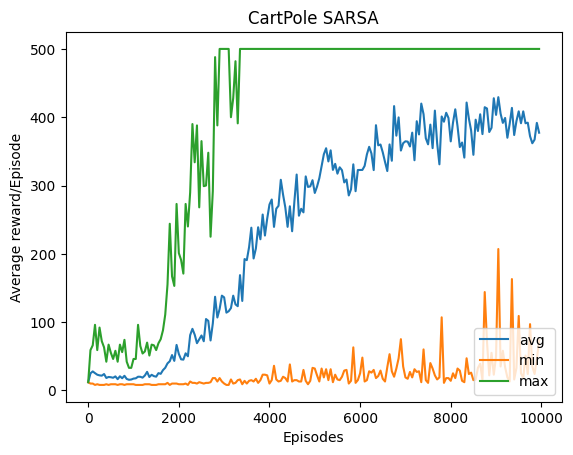

In [7]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt 

env = gym.make("CartPole-v1")


print(env.observation_space.high)	
print(env.observation_space.low)	
print(env.action_space.n)			

#Hyperparamters
EPISODES = 10000
DISCOUNT = 0.95
EPISODE_DISPLAY = 50
LEARNING_RATE = 0.25
EPSILON = 0.2


theta_minmax = env.observation_space.high[2] 
theta_dot_minmax = math.radians(50)
theta_state_size = 50
theta_dot_state_size = 50
Q_TABLE = np.random.randn(theta_state_size,theta_dot_state_size,env.action_space.n)

# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

def discretised_state(state):
	
	discrete_state = np.array([0,0])		
	theta_window =  ( theta_minmax - (-theta_minmax) ) / theta_state_size
	discrete_state[0] = ( state[2] - (-theta_minmax) ) // theta_window
	discrete_state[0] = min(theta_state_size-1, max(0,discrete_state[0]))

	theta_dot_window =  ( theta_dot_minmax - (-theta_dot_minmax) )/ theta_dot_state_size
	discrete_state[1] = ( state[3] - (-theta_dot_minmax) ) // theta_dot_window
	discrete_state[1] = min(theta_dot_state_size-1, max(0,discrete_state[1]))

	return tuple(discrete_state.astype(np.int))

for episode in range(EPISODES):
	episode_reward = 0
	done = False

	if episode % EPISODE_DISPLAY == 0:
		render_state = True
	else:
		render_state = False

	curr_discrete_state = discretised_state(env.reset())
	if np.random.random() > EPSILON:
		action = np.argmax(Q_TABLE[curr_discrete_state])
	else:
		action = np.random.randint(0, env.action_space.n)

	while not done:
		new_state, reward, done, _ = env.step(action)
		new_discrete_state = discretised_state(new_state)

		if np.random.random() > EPSILON:
			new_action = np.argmax(Q_TABLE[new_discrete_state])
		else:
			new_action = np.random.randint(0, env.action_space.n)

		if not done:
			current_q = Q_TABLE[curr_discrete_state+(action,)]			
			max_future_q = Q_TABLE[new_discrete_state+(new_action,)]
			new_q = current_q + LEARNING_RATE*(reward+DISCOUNT*max_future_q-current_q)
			Q_TABLE[curr_discrete_state+(action,)]=new_q

		curr_discrete_state = new_discrete_state
		action = new_action

		episode_reward += reward

	ep_rewards.append(episode_reward)

	if not episode % EPISODE_DISPLAY:
		avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
		ep_rewards_table['ep'].append(episode)
		ep_rewards_table['avg'].append(avg_reward)
		ep_rewards_table['min'].append(min(ep_rewards[-EPISODE_DISPLAY:]))
		ep_rewards_table['max'].append(max(ep_rewards[-EPISODE_DISPLAY:]))
		print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-EPISODE_DISPLAY:])} max:{max(ep_rewards[-EPISODE_DISPLAY:])}")

env.close()

plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) 
plt.title('CartPole SARSA')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()